Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  X__run_id           X__done          quantization_type   task_name        
 Length:60          Length:60          Length:60          Length:60         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Inference.Time   GPU.Energy       CPU.Energy     Memory.Energy     
 Min.   :1488   Min.   : 440.6   Min.   :-616.8   Min.   :-2.10000  
 1st Qu.:1618   1st Qu.: 479.3   1st Qu.: 409.8   1st Qu.: 0.00000  
 Median :2920   Median : 868.0   Median : 572.1   Median : 0.10000  
 Mean   :4228   Mean   :1258.6   Mean   : 580.3   Mean   : 0.09167  
 3rd Qu.:5735   3rd Qu.:1708.6   3rd Qu.: 837.0   3rd Qu.: 0.20000  
 Max.   :9862   Max.   :2939.0   Max.   :1665.2

quantization_type,mean_energy,std_energy
<fct>,<dbl>,<dbl>
32-bit,2786.4762,123.73492
16-bit,1293.8161,75.60212
awq-4-bit,478.9951,19.04097
gptq-4-bit,475.2198,27.60146


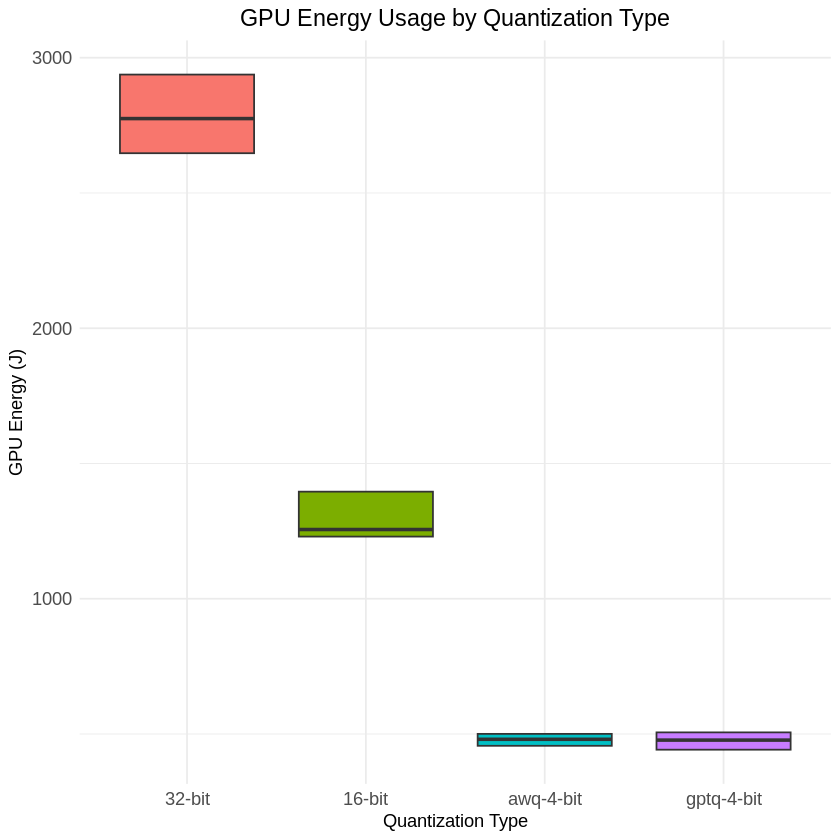

quantization_type,shapiro_stat,shapiro_p_value
<fct>,<dbl>,<dbl>
32-bit,0.8041021,0.0041519965
16-bit,0.7000766,0.0002489808
awq-4-bit,0.8174130,0.0062046912
gptq-4-bit,0.8155518,0.0058620458


quantization_type,log_normality_p_value,sqrt_normality_p_value
<fct>,<dbl>,<dbl>
32-bit,0.0043383534,0.0042495454
16-bit,0.0002810109,0.0002644197
awq-4-bit,0.0060056869,0.0061105118
gptq-4-bit,0.0054944448,0.0056868292



	Kruskal-Wallis rank sum test

data:  GPU.Energy by quantization_type
Kruskal-Wallis chi-squared = 49.879, df = 3, p-value = 8.479e-11


Warning message in cliff.delta.default(data$GPU.Energy[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$GPU.Energy[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$GPU.Energy[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$GPU.Energy[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$GPU.Energy[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”


$`32-bit vs 16-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`32-bit vs awq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`32-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`16-bit vs awq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`16-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`awq-4-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: 0.1111111 (negligible)
95 percent confidence interval:
     lower      upper 
-0.2061377  0.4072232 




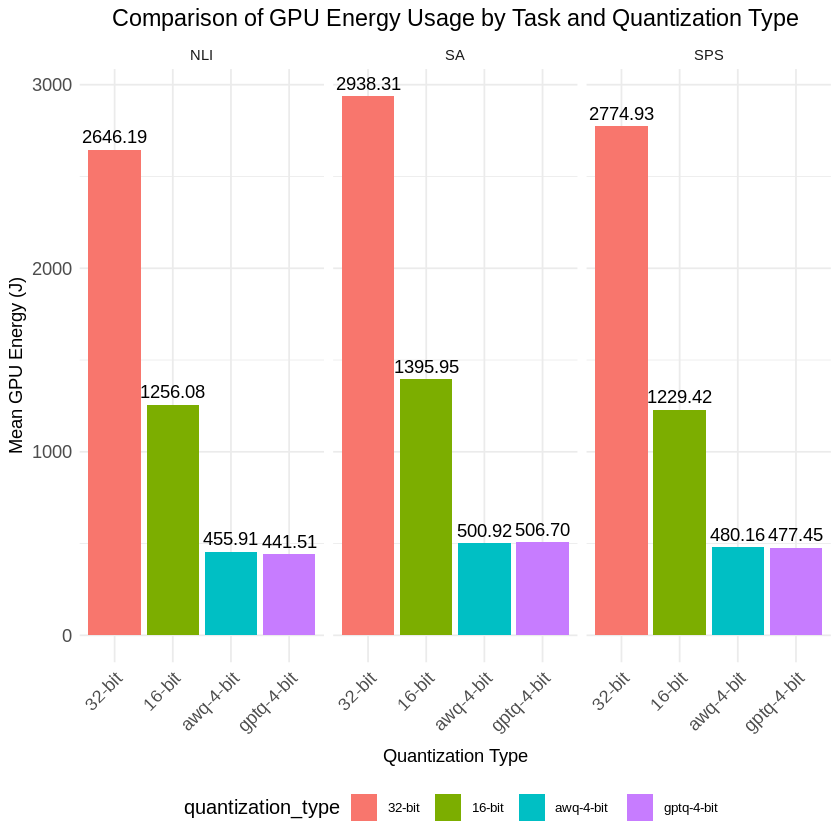

In [ ]:
library(ggplot2)
library(dplyr)
library(rstatix)
library(effsize)

# Set the width and height of the plotting area in inches
options(repr.plot.width = 9, repr.plot.height = 9)

data <- read.csv("run_tables/llama.csv")

summary(data)

# Update factor levels for quantization_type
data$quantization_type <- trimws(data$quantization_type)

# Update the order of factor levels
data$quantization_type <- factor(data$quantization_type, levels = c("32-bit", "16-bit", "awq-4-bit", "gptq-4-bit"))

# Plot boxplot of GPU energy consumption by quantization type
ggplot(data, aes(x = quantization_type, y = GPU.Energy, fill = quantization_type)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, height = 0.5, alpha = 0.5) +
  labs(title = "GPU Energy Usage by Quantization Type",
       x = "Quantization Type",
       y = "GPU Energy (J)") +
  theme_minimal() +
  theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14))

# Calculate mean and standard deviation of energy consumption for each quantization type
energy_stats <- data %>%
  group_by(quantization_type) %>%
  summarise(
    mean_energy = mean(GPU.Energy, na.rm = TRUE),
    std_energy = sd(GPU.Energy, na.rm = TRUE)
  )

energy_stats

# Plot bar chart of GPU energy consumption by task and quantization type
energy_summary <- data %>%
  group_by(task_name, quantization_type) %>%
  summarise(mean_energy = mean(GPU.Energy, na.rm = TRUE), .groups = 'drop')

ggplot(energy_summary, aes(x = quantization_type, y = mean_energy, fill = quantization_type)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  geom_text(aes(label = sprintf("%.2f", mean_energy)), vjust = -0.5, position = position_dodge(width = 0.9)) +
  facet_wrap(~ task_name) +
  labs(title = "Comparison of GPU Energy Usage by Task and Quantization Type",
       x = "Quantization Type",
       y = "Mean GPU Energy (J)") +
  theme_minimal() +
  theme(legend.position = "bottom",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1)) # Rotate x-axis labels

# Normality test
shapiro_results <- data %>%
  group_by(quantization_type) %>%
  summarise(shapiro_stat = shapiro_test(GPU.Energy)$statistic,
            shapiro_p_value = shapiro_test(GPU.Energy)$p.value)

shapiro_results

# Normality test after transformation of GPU.Energy
results <- data %>%
  group_by(quantization_type) %>%
  mutate(
    log_GPU_Energy = log(GPU.Energy + 1),  # Log transformation to handle zero values
    sqrt_GPU_Energy = sqrt(GPU.Energy)     # Square root transformation
  ) %>%
  group_by(quantization_type) %>%
  summarise(
    log_normality_p_value = shapiro_test(log_GPU_Energy)$p.value,
    sqrt_normality_p_value = shapiro_test(sqrt_GPU_Energy)$p.value
  )

results

# Kruskal-Wallis test
kruskal_test_result <- kruskal.test(GPU.Energy ~ quantization_type, data = data)

kruskal_test_result

# Calculate Cliff's Delta to quantify differences between quantization types
delta_32_16 <- cliff.delta(data$GPU.Energy[data$quantization_type == "32-bit"],
                           data$GPU.Energy[data$quantization_type == "16-bit"])

delta_32_awq4 <- cliff.delta(data$GPU.Energy[data$quantization_type == "32-bit"],
                             data$GPU.Energy[data$quantization_type == "awq-4-bit"])

delta_32_gptq4 <- cliff.delta(data$GPU.Energy[data$quantization_type == "32-bit"],
                              data$GPU.Energy[data$quantization_type == "gptq-4-bit"])

delta_16_awq4 <- cliff.delta(data$GPU.Energy[data$quantization_type == "16-bit"],
                             data$GPU.Energy[data$quantization_type == "awq-4-bit"])

delta_16_gptq4 <- cliff.delta(data$GPU.Energy[data$quantization_type == "16-bit"],
                              data$GPU.Energy[data$quantization_type == "gptq-4-bit"])

delta_awq4_gptq4 <- cliff.delta(data$GPU.Energy[data$quantization_type == "awq-4-bit"],
                                data$GPU.Energy[data$quantization_type == "gptq-4-bit"])

# Output results
print(list("32-bit vs 16-bit" = delta_32_16,
           "32-bit vs awq-4-bit" = delta_32_awq4,
           "32-bit vs gptq-4-bit" = delta_32_gptq4,
           "16-bit vs awq-4-bit" = delta_16_awq4,
           "16-bit vs gptq-4-bit" = delta_16_gptq4,
           "awq-4-bit vs gptq-4-bit" = delta_awq4_gptq4))

  X__run_id           X__done          quantization_type   task_name        
 Length:60          Length:60          Length:60          Length:60         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Inference.Time   GPU.Energy       CPU.Energy     Memory.Energy     
 Min.   :1488   Min.   : 440.6   Min.   :-616.8   Min.   :-2.10000  
 1st Qu.:1618   1st Qu.: 479.3   1st Qu.: 409.8   1st Qu.: 0.00000  
 Median :2920   Median : 868.0   Median : 572.1   Median : 0.10000  
 Mean   :4228   Mean   :1258.6   Mean   : 580.3   Mean   : 0.09167  
 3rd Qu.:5735   3rd Qu.:1708.6   3rd Qu.: 837.0   3rd Qu.: 0.20000  
 Max.   :9862   Max.   :2939.0   Max.   :1665.2

quantization_type,mean_energy,std_energy
<fct>,<dbl>,<dbl>
32-bit,2786.4762,123.73492
16-bit,1293.8161,75.60212
awq-4-bit,478.9951,19.04097
gptq-4-bit,475.2198,27.60146


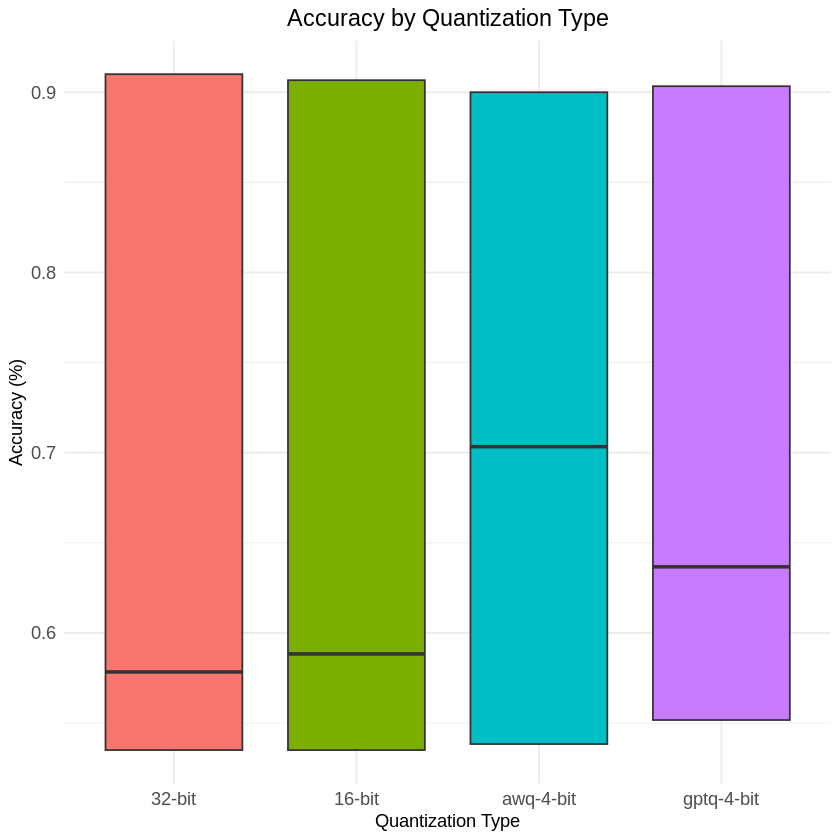

quantization_type,shapiro_stat,shapiro_p_value
<fct>,<dbl>,<dbl>
32-bit,0.6721194,0.0001270389
16-bit,0.6879846,0.0001854116
awq-4-bit,0.8025187,0.0039610149
gptq-4-bit,0.7388460,0.0006680879



	Kruskal-Wallis rank sum test

data:  Accuracy by quantization_type
Kruskal-Wallis chi-squared = 0.62105, df = 3, p-value = 0.8916


$`32-bit vs 16-bit`

Cliff's Delta

delta estimate: 1.851095e-17 (negligible)
95 percent confidence interval:
     lower      upper 
-0.4237288  0.4237288 


$`32-bit vs awq-4-bit`

Cliff's Delta

delta estimate: -0.1111111 (negligible)
95 percent confidence interval:
     lower      upper 
-0.5243277  0.3444617 


$`32-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: -0.1111111 (negligible)
95 percent confidence interval:
     lower      upper 
-0.5243277  0.3444617 


$`16-bit vs awq-4-bit`

Cliff's Delta

delta estimate: -0.1111111 (negligible)
95 percent confidence interval:
     lower      upper 
-0.5243277  0.3444617 


$`16-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: -0.1111111 (negligible)
95 percent confidence interval:
     lower      upper 
-0.5243277  0.3444617 


$`awq-4-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: -0.1111111 (negligible)
95 percent confidence interval:
     lower      upper 
-0.4558994  0.2626745 




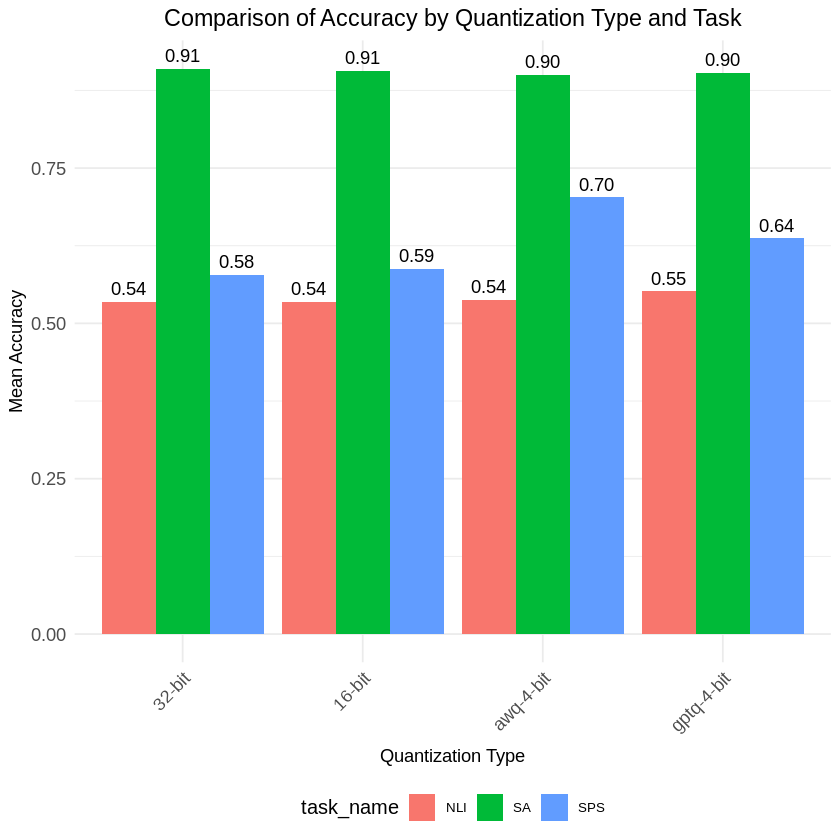

In [ ]:
library(ggplot2)
library(dplyr)
library(rstatix)
library(effsize)

# Set the width and height of the plotting area in inches
options(repr.plot.width = 9, repr.plot.height = 9)

data <- read.csv("run_tables/llama.csv")

summary(data)

# Update factor levels for quantization_type
data$quantization_type <- trimws(data$quantization_type)

# Update the order of factor levels
data$quantization_type <- factor(data$quantization_type, levels = c("32-bit", "16-bit", "awq-4-bit", "gptq-4-bit"))

# Plot boxplot of accuracy by quantization type
ggplot(data, aes(x = quantization_type, y = Accuracy, fill = quantization_type)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, height = 0.002, alpha = 0.5) +
  labs(title = "Accuracy by Quantization Type",
       x = "Quantization Type",
       y = "Accuracy (%)") +
  theme_minimal() +
  theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14))

# Calculate mean and standard deviation of energy consumption for each quantization type
energy_stats <- data %>%
  group_by(quantization_type) %>%
  summarise(
    mean_energy = mean(GPU.Energy, na.rm = TRUE),
    std_energy = sd(GPU.Energy, na.rm = TRUE)
  )

energy_stats

# Plot bar chart of accuracy by task and quantization type
mean_accuracy <- data %>%
  group_by(quantization_type, task_name) %>%
  summarise(mean_accuracy = mean(Accuracy, na.rm = TRUE), .groups = 'drop')

# Create bar chart
ggplot(mean_accuracy, aes(x = quantization_type, y = mean_accuracy, fill = task_name)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = sprintf("%.2f", mean_accuracy)), vjust = -0.5, position = position_dodge(width = 0.9)) +
  labs(title = "Comparison of Accuracy by Quantization Type and Task",
       x = "Quantization Type",
       y = "Mean Accuracy") +
  theme_minimal() +
  theme(legend.position = "bottom",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1)) # Rotate x-axis labels

# Normality test
shapiro_results <- data %>%
  group_by(quantization_type) %>%
  summarise(shapiro_stat = shapiro_test(Accuracy)$statistic,
            shapiro_p_value = shapiro_test(Accuracy)$p.value)

shapiro_results

# Kruskal-Wallis test
kruskal_test_result <- kruskal.test(Accuracy ~ quantization_type, data = data)

kruskal_test_result

# Calculate Cliff's Delta to quantify differences between quantization types
delta_32_16 <- cliff.delta(data$Accuracy[data$quantization_type == "32-bit"],
                           data$Accuracy[data$quantization_type == "16-bit"])

delta_32_awq4 <- cliff.delta(data$Accuracy[data$quantization_type == "32-bit"],
                             data$Accuracy[data$quantization_type == "awq-4-bit"])

delta_32_gptq4 <- cliff.delta(data$Accuracy[data$quantization_type == "32-bit"],
                              data$Accuracy[data$quantization_type == "gptq-4-bit"])

delta_16_awq4 <- cliff.delta(data$Accuracy[data$quantization_type == "16-bit"],
                             data$Accuracy[data$quantization_type == "awq-4-bit"])

delta_16_gptq4 <- cliff.delta(data$Accuracy[data$quantization_type == "16-bit"],
                              data$Accuracy[data$quantization_type == "gptq-4-bit"])

delta_awq4_gptq4 <- cliff.delta(data$Accuracy[data$quantization_type == "awq-4-bit"],
                                data$Accuracy[data$quantization_type == "gptq-4-bit"])

# Output results
print(list("32-bit vs 16-bit" = delta_32_16,
           "32-bit vs awq-4-bit" = delta_32_awq4,
           "32-bit vs gptq-4-bit" = delta_32_gptq4,
           "16-bit vs awq-4-bit" = delta_16_awq4,
           "16-bit vs gptq-4-bit" = delta_16_gptq4,
           "awq-4-bit vs gptq-4-bit" = delta_awq4_gptq4))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




  X__run_id           X__done          quantization_type   task_name        
 Length:60          Length:60          Length:60          Length:60         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Inference.Time   GPU.Energy       CPU.Energy     Memory.Energy     
 Min.   :1488   Min.   : 440.6   Min.   :-616.8   Min.   :-2.10000  
 1st Qu.:1618   1st Qu.: 479.3   1st Qu.: 409.8   1st Qu.: 0.00000  
 Median :2920   Median : 868.0   Median : 572.1   Median : 0.10000  
 Mean   :4228   Mean   :1258.6   Mean   : 580.3   Mean   : 0.09167  
 3rd Qu.:5735   3rd Qu.:1708.6   3rd Qu.: 837.0   3rd Qu.: 0.20000  
 Max.   :9862   Max.   :2939.0   Max.   :1665.2

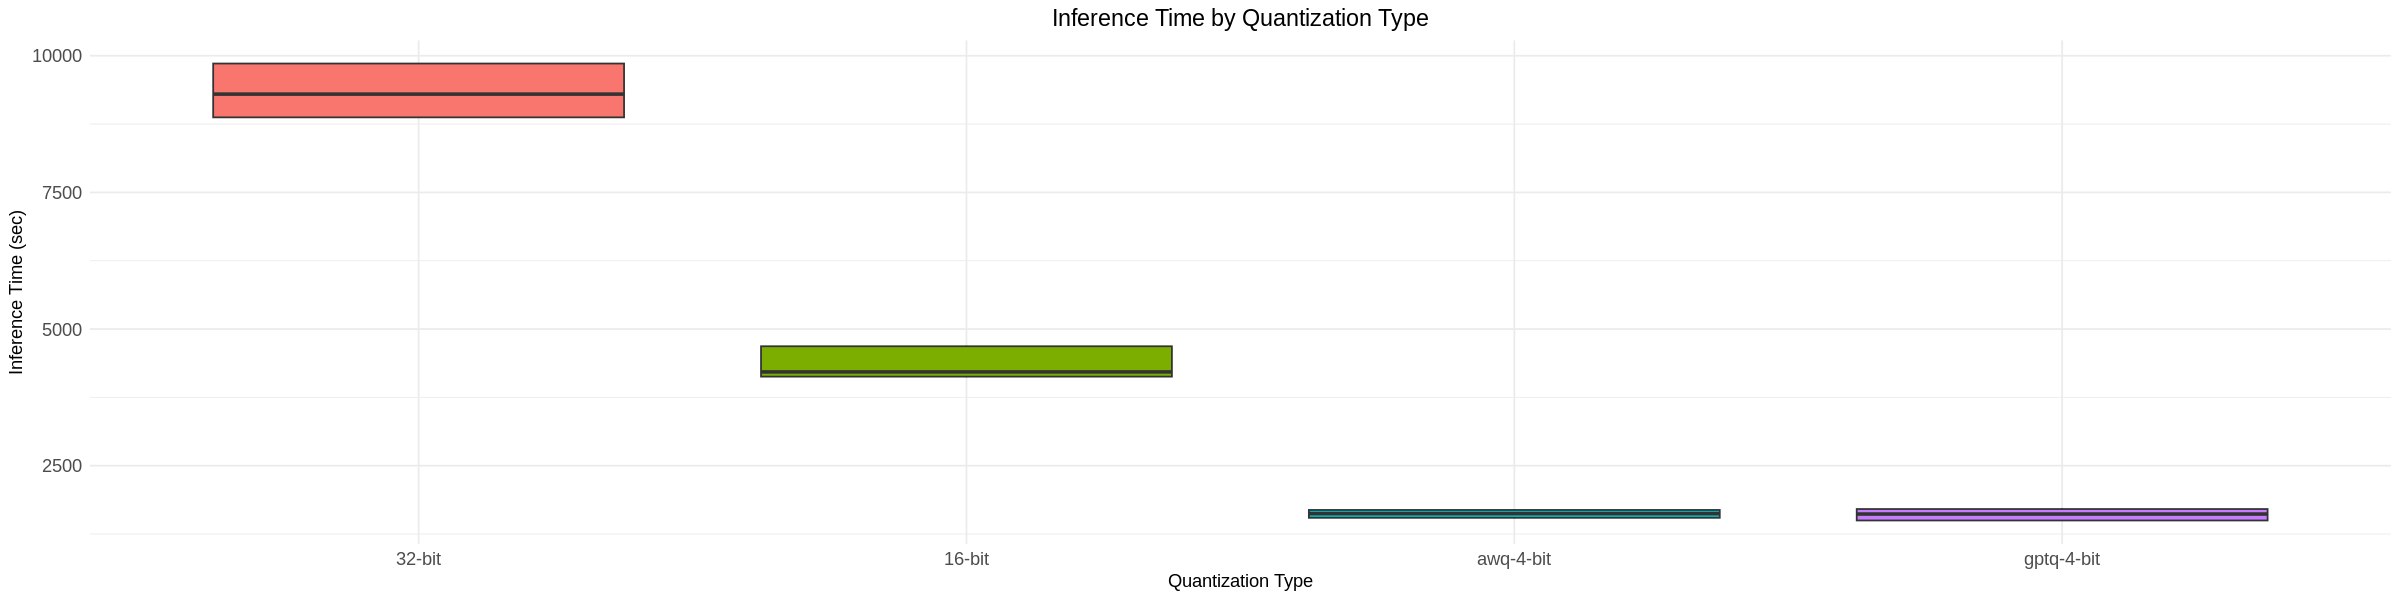

quantization_type,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
32-bit,Inference.Time,0.8041276,0.0041551448
16-bit,Inference.Time,0.7054817,0.0002845983
awq-4-bit,Inference.Time,0.8376203,0.0116550748
gptq-4-bit,Inference.Time,0.8376770,0.0116761368


quantization_type,log_normality_p_value,sqrt_normality_p_value
<fct>,<dbl>,<dbl>
32-bit,0.0043816969,0.0042722856
16-bit,0.0003225531,0.0003028482
awq-4-bit,0.0113818038,0.0115294722
gptq-4-bit,0.0108743648,0.0112922281



	Kruskal-Wallis rank sum test

data:  Inference.Time by quantization_type
Kruskal-Wallis chi-squared = 49.868, df = 3, p-value = 8.523e-11


Warning message in cliff.delta.default(data$Inference.Time[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$Inference.Time[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$Inference.Time[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$Inference.Time[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(data$Inference.Time[data$quantization_type == :
“The samples are fully disjoint, using approximate Confidence Interval estimation”


$`32-bit vs 16-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`32-bit vs awq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`32-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`16-bit vs awq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`16-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


$`awq-4-bit vs gptq-4-bit`

Cliff's Delta

delta estimate: 0.1022222 (negligible)
95 percent confidence interval:
     lower      upper 
-0.2140337  0.3990815 




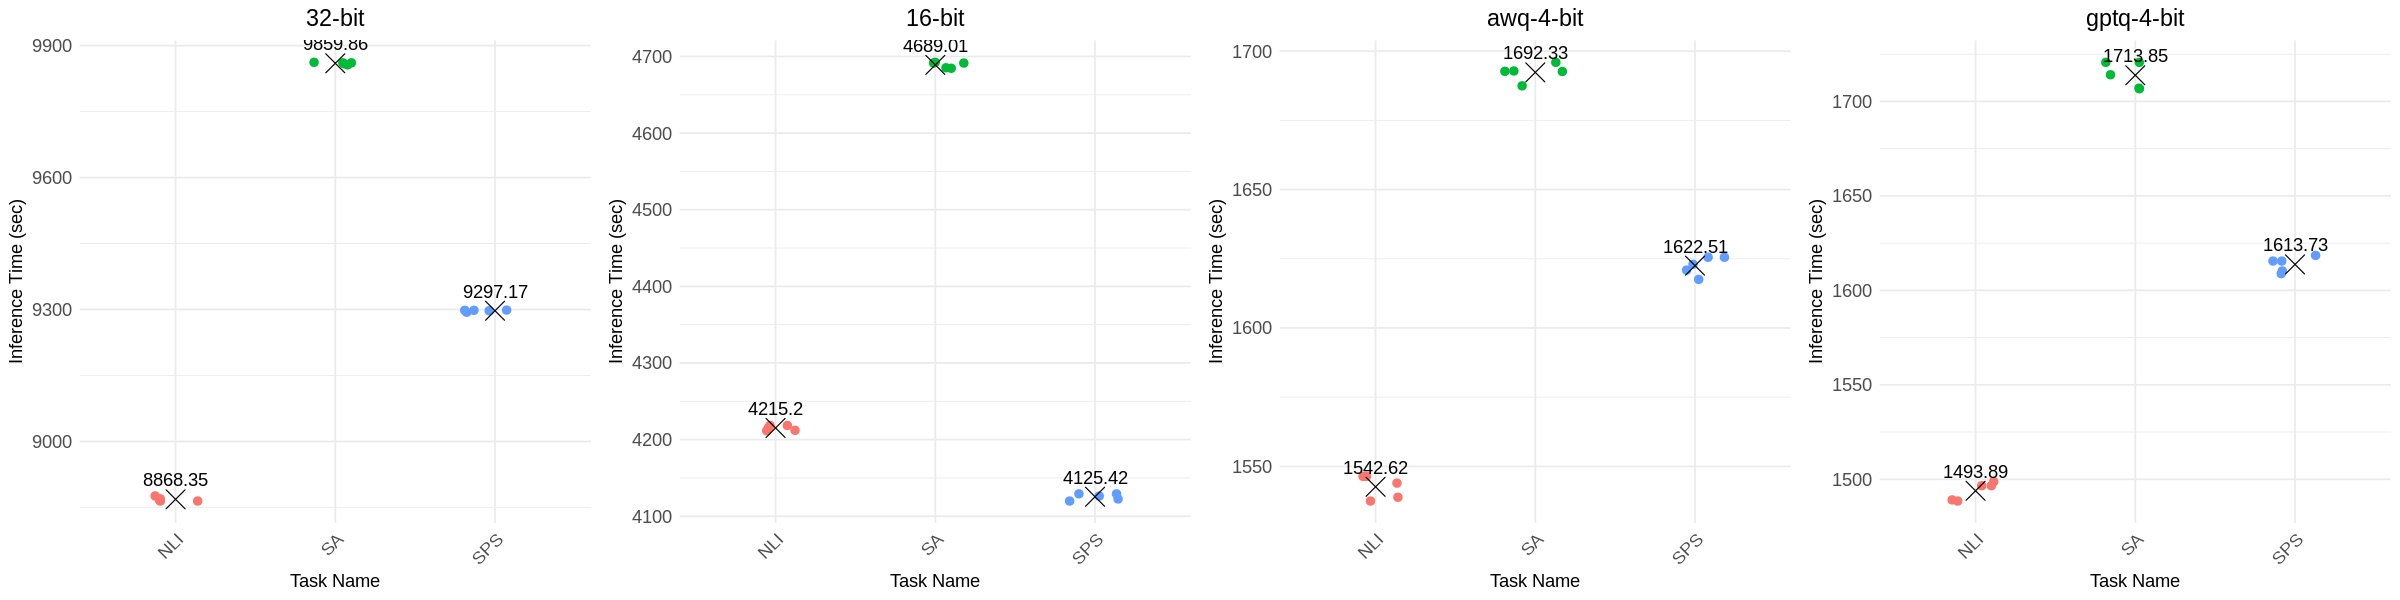

In [ ]:
library(ggplot2)
library(dplyr)
library(rstatix)
library(effsize)
library(gridExtra)
library(repr)

# Set the width and height of the plotting area in inches
options(repr.plot.width = 9, repr.plot.height = 9)

data <- read.csv("run_tables/llama.csv")

summary(data)

# Update factor levels for quantization_type
data$quantization_type <- trimws(data$quantization_type)

# Update the order of factor levels
data$quantization_type <- factor(data$quantization_type, levels = c("32-bit", "16-bit", "awq-4-bit", "gptq-4-bit"))

# Plot boxplot of inference time by quantization type
ggplot(data, aes(x = quantization_type, y = Inference.Time, fill = quantization_type)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, height = 0.5, alpha = 0.5) +
  labs(title = "Inference Time by Quantization Type",
       x = "Quantization Type",
       y = "Inference Time (sec)") +
  theme_minimal() +
  theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14))

# Modify plot_by_quantization function to adjust aspect.ratio
plot_by_quantization <- function(quant_type) {
  df <- subset(data, quantization_type == quant_type)

  # Calculate average for each task
  avg_data <- aggregate(`Inference.Time` ~ task_name, data = df, mean)

  ggplot(df, aes(x = task_name, y = `Inference.Time`, color = task_name)) +
    geom_point(size = 2, show.legend = FALSE, position = position_jitter(width = 0.2, height = 0)) +  # Jitter points to avoid overlap
    geom_point(data = avg_data, aes(x = task_name, y = `Inference.Time`), color = "black", shape = 4, size = 5) +  # Cross marker for average
    geom_text(data = avg_data, aes(x = task_name, y = `Inference.Time`, label = round(`Inference.Time`, 2)), vjust = 0, hjust = 1.2, color = "black", size = 4) +  # Show average values
    labs(title = quant_type, x = "Task Name", y = "Inference Time (sec)") +
    theme_minimal() +
    theme(legend.position = "bottom",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1)) # Rotate x-axis labels
}

options(repr.plot.width = 20, repr.plot.height = 5)
# Regenerate four plots
p1 <- plot_by_quantization('32-bit')
p2 <- plot_by_quantization('16-bit')
p3 <- plot_by_quantization('awq-4-bit')
p4 <- plot_by_quantization('gptq-4-bit')

# Arrange scatter plots in a row of four columns
grid.arrange(p1, p2, p3, p4, ncol = 4)

# Normality test
shapiro_test_results <- data %>%
  group_by(quantization_type) %>%
  filter(length(unique(Inference.Time)) > 1) %>% # Filter out groups with all identical values
  shapiro_test(Inference.Time)

shapiro_test_results

# Normality test after log and square root transformation
results <- data %>%
  group_by(quantization_type) %>%
  mutate(
    log_Inference_Time = log(Inference.Time + 1),  # Log transformation to handle zero values
    sqrt_Inference_Time = sqrt(Inference.Time)     # Square root transformation
  ) %>%
  group_by(quantization_type) %>%
  filter(length(unique(log_Inference_Time)) > 1 & length(unique(sqrt_Inference_Time)) > 1) %>% # Filter out groups with all identical values
  summarise(
    log_normality_p_value = shapiro_test(log_Inference_Time)$p.value,
    sqrt_normality_p_value = shapiro_test(sqrt_Inference_Time)$p.value
  )

results

# Kruskal-Wallis test
kruskal_test_result <- kruskal.test(Inference.Time ~ quantization_type, data = data)

kruskal_test_result

# Calculate Cliff's Delta to quantify differences between quantization types
delta_32_16 <- cliff.delta(data$Inference.Time[data$quantization_type == "32-bit"],
                           data$Inference.Time[data$quantization_type == "16-bit"])

delta_32_awq4 <- cliff.delta(data$Inference.Time[data$quantization_type == "32-bit"],
                             data$Inference.Time[data$quantization_type == "awq-4-bit"])

delta_32_gptq4 <- cliff.delta(data$Inference.Time[data$quantization_type == "32-bit"],
                              data$Inference.Time[data$quantization_type == "gptq-4-bit"])

delta_16_awq4 <- cliff.delta(data$Inference.Time[data$quantization_type == "16-bit"],
                             data$Inference.Time[data$quantization_type == "awq-4-bit"])

delta_16_gptq4 <- cliff.delta(data$Inference.Time[data$quantization_type == "16-bit"],
                              data$Inference.Time[data$quantization_type == "gptq-4-bit"])

delta_awq4_gptq4 <- cliff.delta(data$Inference.Time[data$quantization_type == "awq-4-bit"],
                                data$Inference.Time[data$quantization_type == "gptq-4-bit"])

# Output results
print(list("32-bit vs 16-bit" = delta_32_16,
           "32-bit vs awq-4-bit" = delta_32_awq4,
           "32-bit vs gptq-4-bit" = delta_32_gptq4,
           "16-bit vs awq-4-bit" = delta_16_awq4,
           "16-bit vs gptq-4-bit" = delta_16_gptq4,
           "awq-4-bit vs gptq-4-bit" = delta_awq4_gptq4))

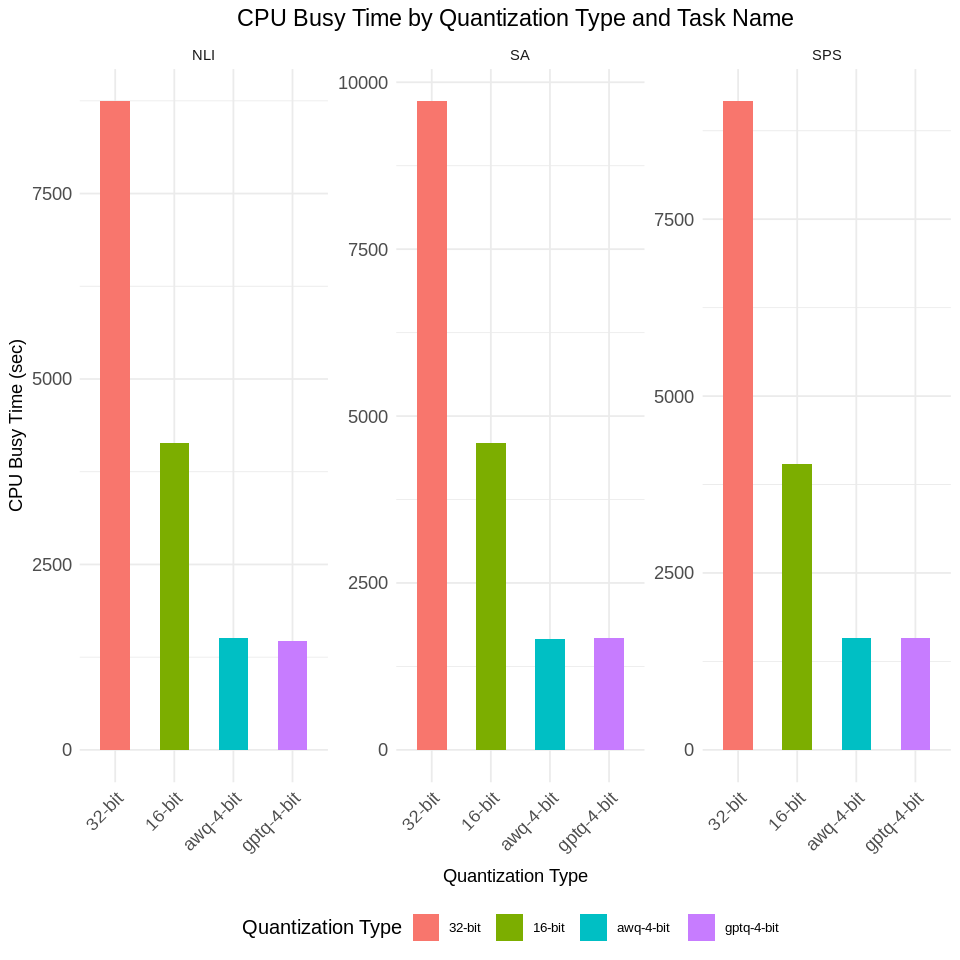

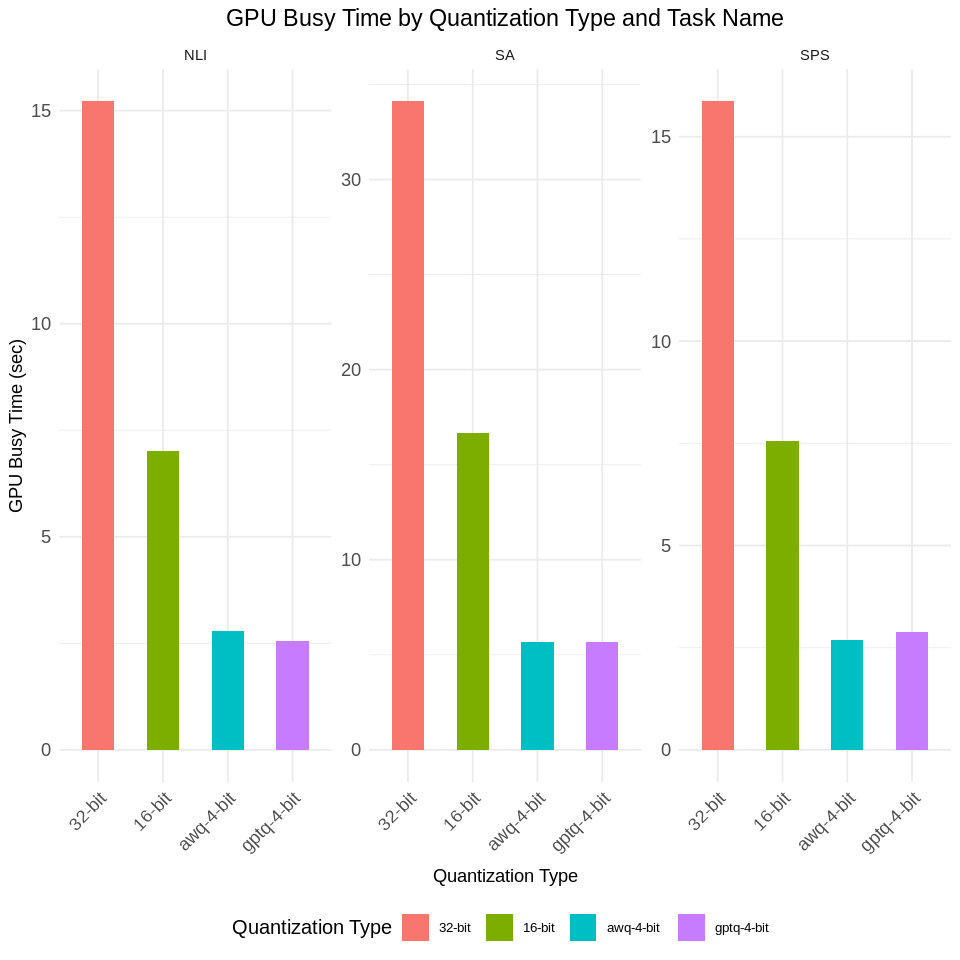

quantization_type,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
32-bit,CPU.Busy.Time,0.8067594,0.0044948978
16-bit,CPU.Busy.Time,0.7002361,0.0002499605
awq-4-bit,CPU.Busy.Time,0.8194611,0.0066065410
gptq-4-bit,CPU.Busy.Time,0.8113648,0.0051627144


quantization_type,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
32-bit,GPU.Busy.Time,0.6474876,7.194731e-05
16-bit,GPU.Busy.Time,0.6553068,8.597691e-05
awq-4-bit,GPU.Busy.Time,0.6398798,6.061992e-05
gptq-4-bit,GPU.Busy.Time,0.6416560,6.308259e-05


quantization_type,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
32-bit,Memory.Usage,0.8033793,4.063624e-03
16-bit,Memory.Usage,0.6034271,2.738198e-05



	Kruskal-Wallis rank sum test

data:  CPU.Busy.Time by quantization_type
Kruskal-Wallis chi-squared = 49.879, df = 3, p-value = 8.479e-11



	Kruskal-Wallis rank sum test

data:  GPU.Busy.Time by quantization_type
Kruskal-Wallis chi-squared = 46.359, df = 3, p-value = 4.757e-10



	Kruskal-Wallis rank sum test

data:  Memory.Usage by quantization_type
Kruskal-Wallis chi-squared = 57.509, df = 3, p-value = 2.001e-12


Warning message in cliff.delta.default(x, y, conf.level, use.unbiased, use.normal, :
“The samples are fully disjoint, using approximate Confidence Interval estimation”
Warning message in cliff.delta.default(x, y, conf.level, use.unbiased, use.normal, :
“The samples are fully disjoint, using approximate Confidence Interval estimation”



Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 



Cliff's Delta

delta estimate: 0.5911111 (large)
95 percent confidence interval:
    lower     upper 
0.1563059 0.8340040 



Cliff's Delta

delta estimate: 1 (large)
95 percent confidence interval:
    lower     upper 
0.9904211 1.0000000 


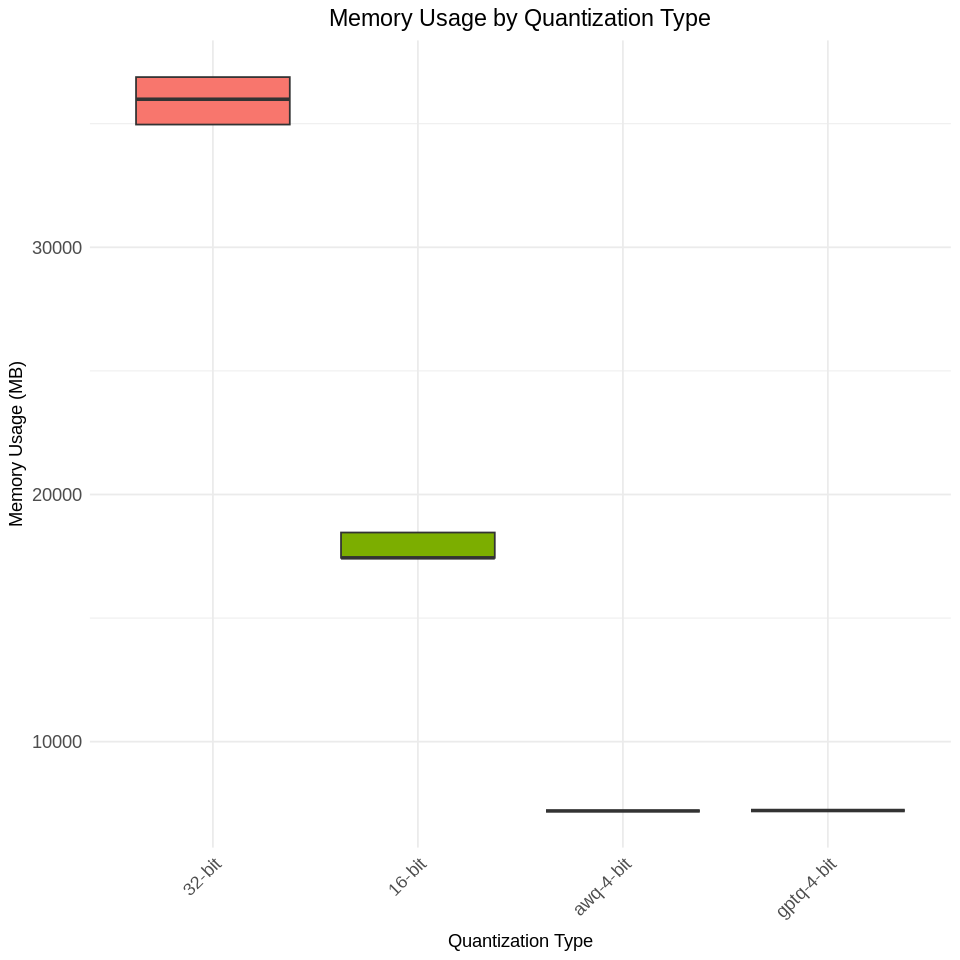

In [ ]:
library(ggplot2)
library(dplyr)
library(rstatix)
library(effsize)

# Set the width and height of the plotting area in inches
options(repr.plot.width = 9, repr.plot.height = 9)

data <- read.csv("run_table_1.csv")

# Update factor levels for quantization_type
data$quantization_type <- trimws(data$quantization_type)

# Update the order of factor levels
data$quantization_type <- factor(data$quantization_type, levels = c("32-bit", "16-bit", "awq-4-bit", "gptq-4-bit"))

# Plot bar chart of CPU busy time by quantization type and task name
ggplot(data, aes(x = quantization_type, y = CPU.Busy.Time, fill = quantization_type)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.5) +
  labs(title = "CPU Busy Time by Quantization Type and Task Name",
       x = "Quantization Type", y = "CPU Busy Time (sec)", fill = "Quantization Type") +
  theme_minimal() +
  theme(legend.position = "bottom",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1))+ # Rotate x-axis labels
  facet_wrap(~task_name, scales = "free")

# Plot bar chart of GPU busy time by quantization type and task name
ggplot(data, aes(x = quantization_type, y = GPU.Busy.Time, fill = quantization_type)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.5) +
  labs(title = "GPU Busy Time by Quantization Type and Task Name",
       x = "Quantization Type", y = "GPU Busy Time (sec)", fill = "Quantization Type") +
  theme_minimal() +
  theme(legend.position = "bottom",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1))+ # Rotate x-axis labels
  facet_wrap(~task_name, scales = "free")

# Plot boxplot of memory usage by quantization type
ggplot(data, aes(x = quantization_type, y = Memory.Usage, fill = quantization_type)) +
  geom_boxplot() +
  geom_jitter(width = 0.2,height = 0.5, alpha = 0.5)+
  labs(title = "Memory Usage by Quantization Type",
       x = "Quantization Type",
       y = "Memory Usage (MB)") +
  theme_minimal() +
  theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14), # Title font size
        axis.title.y = element_text(size = 14), # Y-axis title font size
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14), # X-axis title font size
        axis.text.x = element_text(size = 14))

# Normality test
shapiro_test_cpu <- data %>%
  group_by(quantization_type) %>%
  filter(length(unique(CPU.Busy.Time)) > 1) %>% # Filter out groups with all identical values
  shapiro_test(CPU.Busy.Time)
shapiro_test_cpu

shapiro_test_gpu <- data %>%
  group_by(quantization_type) %>%
  filter(length(unique(GPU.Busy.Time)) > 1) %>% # Filter out groups with all identical values
  shapiro_test(GPU.Busy.Time)
shapiro_test_gpu

shapiro_test_memory <- data %>%
  group_by(quantization_type) %>%
  filter(n() >= 1 & length(unique(Memory.Usage)) > 1) %>% # Filter out groups with sample size less than 3 or only one unique value of Memory.Usage
  # Add a check to ensure the group has data before applying shapiro_test
  do(if (nrow(.) > 0) shapiro_test(., Memory.Usage) else tibble(statistic = NA, p.value = NA)) %>%
  ungroup() # Ungroup to avoid potential issues later

shapiro_test_memory

# Kruskal-Wallis test
kruskal_test_cpu <- kruskal.test(CPU.Busy.Time ~ quantization_type, data = data)
kruskal_test_gpu <- kruskal.test(GPU.Busy.Time ~ quantization_type, data = data)
kruskal_test_memory <- kruskal.test(Memory.Usage ~ quantization_type, data = data)

kruskal_test_cpu
kruskal_test_gpu
kruskal_test_memory

# Calculate Cliff's Delta to quantify differences between quantization types
cliffs_delta_cpu <- cliff.delta(CPU.Busy.Time ~ quantization_type, data = data)
cliffs_delta_gpu <- cliff.delta(GPU.Busy.Time ~ quantization_type, data = data)
cliffs_delta_memory <- cliff.delta(Memory.Usage ~ quantization_type, data = data)

cliffs_delta_cpu
cliffs_delta_gpu
cliffs_delta_memory